In [13]:
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt

# Comparative Analysis

Параметры: 
- context length : 20
- n_embed : 128
- n_head : 4
- n_layer: 2
- memory_dim : 64
- dropout : 0.1
- train size : 38938
- val size : 4327

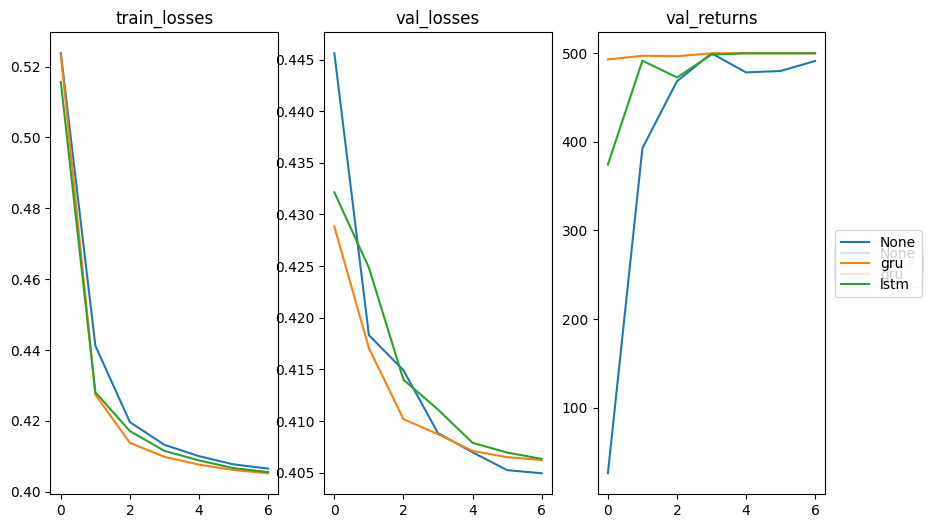

In [18]:
result = {}
path = "models/default_parameters/"
for f in glob(path+ "*.csv"):
    result[f.split("_")[5]] = pd.read_csv(f)

fig = plt.figure(figsize=(10, 6))
grid = fig.add_gridspec(1, 3)
sp1 = fig.add_subplot(grid[0, 0])
sp2 = fig.add_subplot(grid[0, 1])
sp3 = fig.add_subplot(grid[0, 2])
sp = [sp1, sp2, sp3]

sp[0].set_title("train_losses")
sp[1].set_title("val_losses")
sp[2].set_title("val_returns")

axes, labels = [], []

for memory_type in ["None", "gru", "lstm"]:
    data = result[memory_type]

    ax1, = sp[0].plot(data["train_losses"], label=memory_type)
    ax2, = sp[1].plot(data["val_losses"], label=memory_type)
    ax3, = sp[2].plot(data["val_returns"], label=memory_type)
    
    axes.append(ax1)
    labels.append(memory_type)

    fig.legend(axes, labels, loc='center right')

Final performance metrics:

None: Average reward over 5 episodes: 456.00
GRU: Average reward over 5 episodes: 500.00
LSTM: Average reward over 5 episodes: 500.00

Вывод: 

DT GRU и DT LSTM быстрее сходятся и показывают выше val_returns на дефолтных параметрах, решение с памятью более стабильное.

Лучше всего себя показывает DT GRU

-------------------------

Изучаемый параметр:
- context length : 5, 20, 100
  
Параметры: 
- n_embed : 128
- n_head : 4
- n_layer: 2
- memory_dim : 64
- dropout : 0.1
- train size : 38938
- val size : 4327

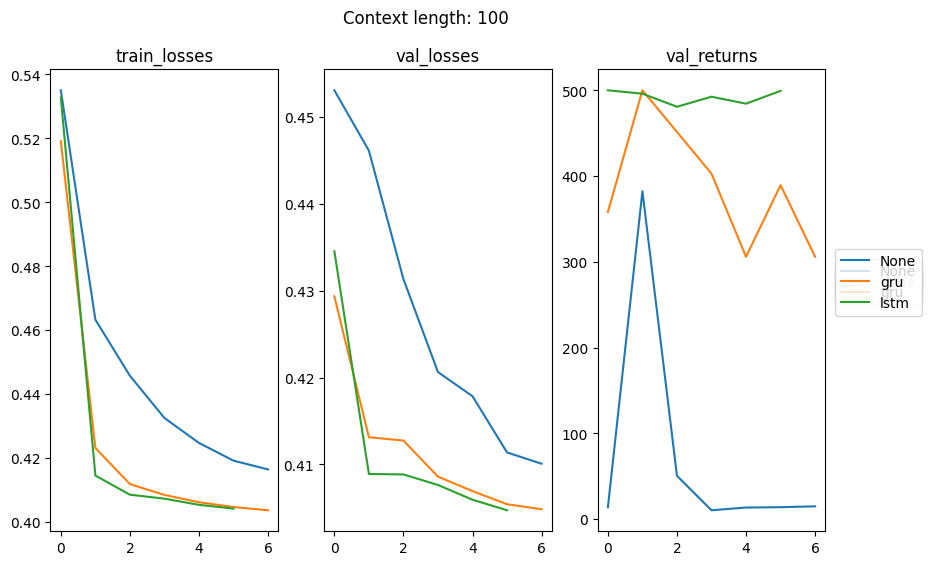

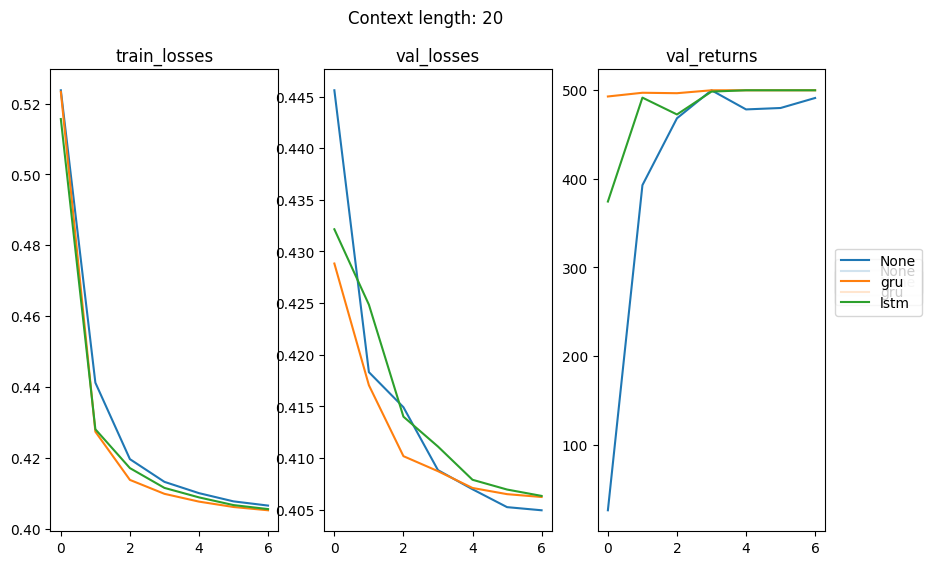

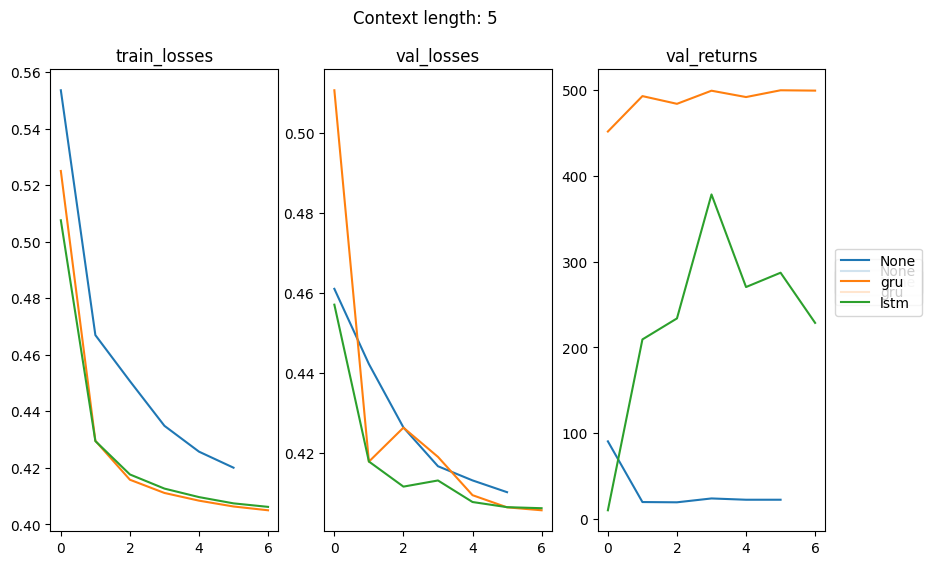

In [19]:
result = {}
path = "models/context_length/"
context_length = []
for f in glob(path+ "*.csv"):
    cl = f.split("_")[-1][:-4]
    if cl not in context_length:
        context_length.append(cl)
        result[cl] = {}
    result[cl][f.split("_")[5]] = pd.read_csv(f)
for i in context_length:
    fig = plt.figure(figsize=(10, 6))
    grid = fig.add_gridspec(1, 3)
    sp1 = fig.add_subplot(grid[0, 0])
    sp2 = fig.add_subplot(grid[0, 1])
    sp3 = fig.add_subplot(grid[0, 2])
    sp = [sp1, sp2, sp3]
    
    fig.suptitle(f"Context length: {i}")

    sp[0].set_title("train_losses")
    sp[1].set_title("val_losses")
    sp[2].set_title("val_returns")

    axes, labels = [], []

    for memory_type in ["None", "gru", "lstm"]:
        data = result[i][memory_type]

        ax1, = sp[0].plot(data["train_losses"], label=memory_type)
        ax2, = sp[1].plot(data["val_losses"], label=memory_type)
        ax3, = sp[2].plot(data["val_returns"], label=memory_type)
        
        axes.append(ax1)
        labels.append(memory_type)

        fig.legend(axes, labels, loc='center right')

Final performance metrics:

**Context length 5**

None: Average reward over 5 episodes: 22.00

GRU: Average reward over 5 episodes: 500.00

LSTM: Average reward over 5 episodes: 174.00

**Context length 20**

None: Average reward over 5 episodes: 456.00

GRU: Average reward over 5 episodes: 500.00

LSTM: Average reward over 5 episodes: 500.00

**Context length 100**

None: Average reward over 5 episodes: 14.00

GRU: Average reward over 5 episodes: 305.00

LSTM: Average reward over 5 episodes: 500.00

Вывод: 

DT GRU устойчив при уменьшении контекстной длины, а DT LSTM при увеличении.


-------------------------

Изучаемый параметр:
- train size : 50%, 80%, 90%
  
Параметры:
- context length : 20
- n_embed : 128
- n_head : 4
- n_layer: 2
- memory_dim : 64
- dropout : 0.1

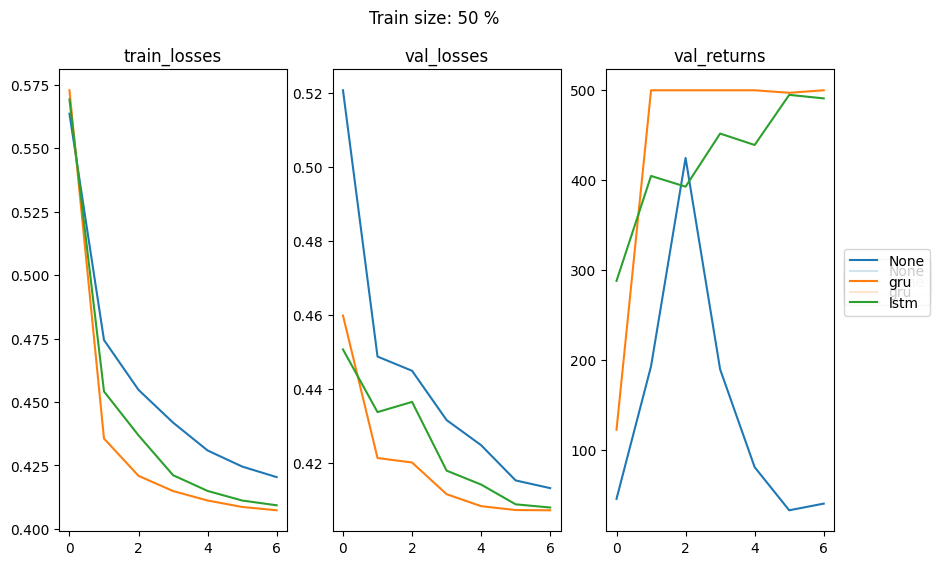

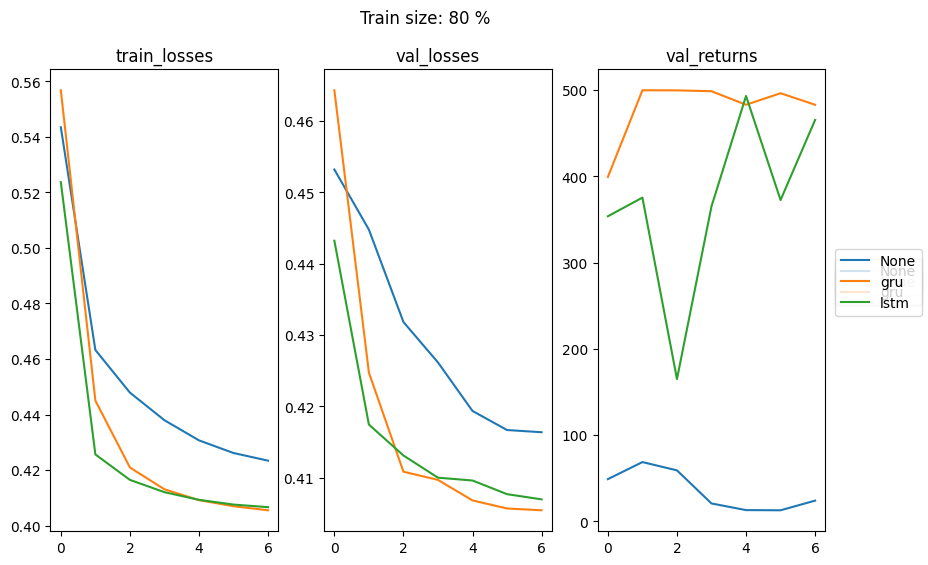

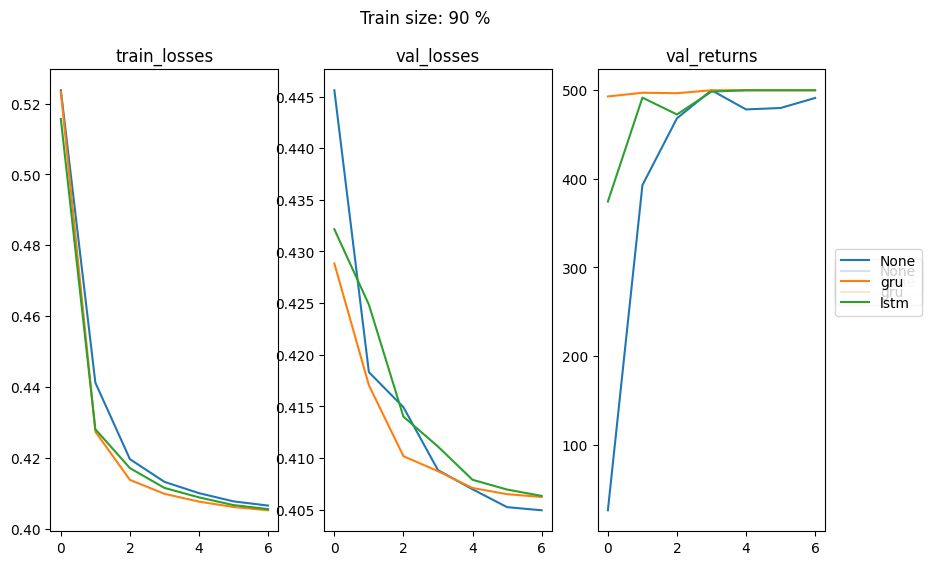

In [23]:
result = {}
path = "models/train_size/"
train_size = []
for f in glob(path+ "*.csv"):
    ts = f.split("_")[-1][:-4]
    if ts not in train_size:
        train_size.append(ts)
        result[ts] = {}
    result[ts][f.split("_")[5]] = pd.read_csv(f)
for i in train_size:
    fig = plt.figure(figsize=(10, 6))
    grid = fig.add_gridspec(1, 3)
    sp1 = fig.add_subplot(grid[0, 0])
    sp2 = fig.add_subplot(grid[0, 1])
    sp3 = fig.add_subplot(grid[0, 2])
    sp = [sp1, sp2, sp3]
    
    fig.suptitle(f"Train size: {i} %")

    sp[0].set_title("train_losses")
    sp[1].set_title("val_losses")
    sp[2].set_title("val_returns")

    axes, labels = [], []

    for memory_type in ["None", "gru", "lstm"]:
        data = result[i][memory_type]

        ax1, = sp[0].plot(data["train_losses"], label=memory_type)
        ax2, = sp[1].plot(data["val_losses"], label=memory_type)
        ax3, = sp[2].plot(data["val_returns"], label=memory_type)
        
        axes.append(ax1)
        labels.append(memory_type)

        fig.legend(axes, labels, loc='center right')

Final performance metrics:

**Train size 50%**

None: Average reward over 5 episodes: 39.00
GRU: Average reward over 5 episodes: 500.00
LSTM: Average reward over 5 episodes: 490.00


**Train size 80%**

None: Average reward over 5 episodes: 13.00
GRU: Average reward over 5 episodes: 500.00
LSTM: Average reward over 5 episodes: 496.00


**Train size 90%**

None: Average reward over 5 episodes: 456.00
GRU: Average reward over 5 episodes: 500.00
LSTM: Average reward over 5 episodes: 500.00

Вывод: 

DT GRU устойчив при уменьшении тренировочного набора

**Общий вывод: DT с памятью показывают себя намного лучше. DT GRU более устойчив к изменениям входных параметров, чем LSTM и сходится быстрее**